# Prepare Environment

In [ ]:
import numpy as np
import math, copy
import matplotlib
import matplotlib.pyplot as plt

font = {'size' : 18}
matplotlib.rc('font', **font)

np.set_printoptions(precision=3)  # reduced display precision on numpy arrays

# Notation

Here is a summary of some of the notation you will encounter, updated for multiple features.  

|General <img width=70/> <br />  Notation  <img width=70/> | Description<img width=350/>| Python (if applicable) |
|: ------------|: ------------------------------------------------------------||
| $a$ | scalar, non bold                                                      ||
| $\mathbf{a}$ | vector, bold                                                 ||
| $\mathbf{A}$ | matrix, bold capital                                         ||
| **Regression** |         |    |     |
|  $\mathbf{X}$ | training example maxtrix                  | `X` |   
|  $\mathbf{y}$  | training example  targets                | `y` 
|  $\mathbf{x}^{(i)}$, $y^{(i)}$ | $i_{th}$ training Example | `X[i]`, `y[i]`|
| m | number of training examples | `m`|
| n | number of features in each example | `n`|
|  $\mathbf{w}$  |  parameter: weight,                       | `w`    |
|  $b$           |  parameter: bias                                           | `b`    |     
| $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ | The result of the model evaluation at $\mathbf{x^{(i)}}$ parameterized by $\mathbf{w},b$: $f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)}+b$  | `f_wb` | 
|$\frac{\partial J(\mathbf{w},b)}{\partial w_j}$| the gradient or partial derivative of cost with respect to a parameter $w_j$ |`dj_dw[j]`| 
|$\frac{\partial J(\mathbf{w},b)}{\partial b}$| the gradient or partial derivative of cost with respect to a parameter $b$| `dj_db`|


# Dataset

You will use the dataset for student pass/fail prediction below in this exercise. The dataset contains 25 examples with three features (quiz, lab and midterm) shown in a table below.

| **Quiz (25)** | **Lab (15)** | **Midterm (25)** | **Pass (0/1)** |
|:--------:|:-------:|:-----------:|:--------:|
|   18.0   |   14.7  |     15.0    |    1.0   |
|    4.5   |   14.6  |     3.4     |    0.0   |
|    8.7   |   14.1  |     4.1     |    0.0   |
|    3.5   |   15.0  |     12.8    |    0.0   |
|   12.0   |   13.7  |     13.4    |    1.0   |
|   20.0   |   14.4  |     18.1    |    1.0   |
|    8.0   |   6.4   |     8.4     |    0.0   |
|    5.5   |   14.8  |     4.4     |    0.0   |
|    2.6   |   6.5   |     1.3     |    0.0   |
|    9.3   |   13.3  |     5.3     |    0.0   |
|    9.2   |   14.6  |     20.3    |    1.0   |
|   17.4   |   14.3  |     10.9    |    1.0   |
|   14.4   |   15.0  |     19.1    |    1.0   |
|    5.4   |   13.2  |     1.9     |    0.0   |
|    0.5   |   7.2   |     0.0     |    0.0   |
|    6.3   |   12.5  |     1.6     |    0.0   |
|    6.2   |   13.2  |     5.6     |    0.0   |
|   18.4   |   14.9  |     17.5    |    1.0   |
|   19.4   |   15.0  |     20.6    |    1.0   |
|   22.7   |   14.1  |     15.9    |    1.0   |
|   24.1   |   15.0  |     25.0    |    1.0   |
|    8.6   |   12.8  |     11.6    |    0.0   |
|   17.9   |   14.8  |     12.5    |    1.0   |
|   13.8   |   15.0  |     8.4     |    1.0   |
|    5.2   |   14.3  |     1.6     |    0.0   |

In [ ]:
X = np.array([
    [18.0,14.7,15.0],
    [4.5,14.6,3.4],
    [8.7,14.1,4.1],
    [3.5,15.0,12.8],
    [12.0,13.7,13.4],
    [20.0,14.4,18.1],
    [8.0,6.4,8.4],
    [5.5,14.8,4.4],
    [2.6,6.5,1.3],
    [9.3,13.3,5.3],
    [9.2,14.6,20.3],
    [17.4,14.3,10.9],
    [14.4,15.0,19.1],
    [5.4,13.2,1.9],
    [0.5,7.2,0.0],
    [6.3,12.5,1.6],
    [6.2,13.2,5.6],
    [18.4,14.9,17.5],
    [19.4,15.0,20.6],
    [22.7,14.1,15.9],
    [24.1,15.0,25.0],
    [8.6,12.8,11.6],
    [17.9,14.8,12.5],
    [13.8,15.0,8.4],
    [5.2,14.3,1.6],
])
y = np.array([1,0,0,0,1,1,0,0,0,0,1,1,1,0,0,0,0,1,1,1,1,0,1,1,0])

In [ ]:
X_features = ['Quiz','Lab','Midterm']
n = X.shape[1]

assert n == len(X_features)

In [ ]:
# Display data is stored in numpy array/matrix
print(f"X Shape: {X.shape}, X Type:{type(X)})")
print(X[:10])
print(f"y Shape: {y.shape}, y Type:{type(y)})")
print(y[:10])

X Shape: (25, 3), X Type:<class 'numpy.ndarray'>)
[[18.  14.7 15. ]
 [ 4.5 14.6  3.4]
 [ 8.7 14.1  4.1]
 [ 3.5 15.  12.8]
 [12.  13.7 13.4]
 [20.  14.4 18.1]
 [ 8.   6.4  8.4]
 [ 5.5 14.8  4.4]
 [ 2.6  6.5  1.3]
 [ 9.3 13.3  5.3]]
y Shape: (25,), y Type:<class 'numpy.ndarray'>)
[1 0 0 0 1 1 0 0 0 0]


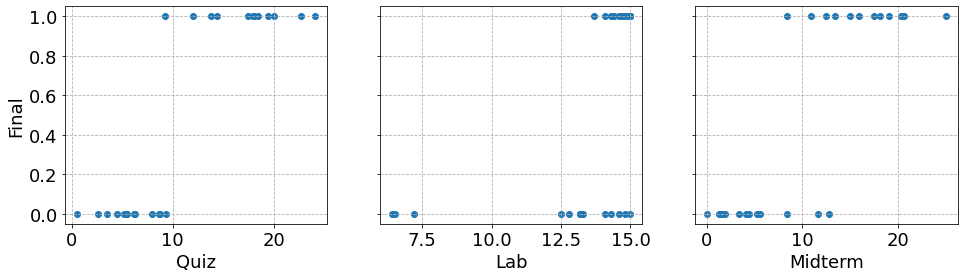

In [ ]:
fig, ax = plt.subplots(1, n, figsize=(16, 4), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X[:,i],y)
    ax[i].grid(linestyle='--')
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("Final")
plt.show()
plt.close('all')

# Sigmoid Function

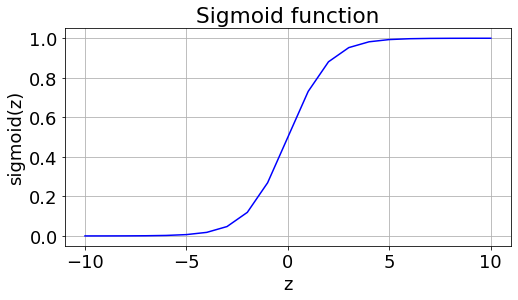

Recall that for logistic regression, the model is represented as

$$ f_{\mathbf{w},b}(x) = g(\mathbf{w}\cdot \mathbf{x} + b)$$
where function $g$ is the sigmoid function. The sigmoid function is defined as:

$$g(z) = \frac{1}{1+e^{-z}}$$

Let's implement the sigmoid function first, so it can be used by the rest of this assignment.

Note that
- In the case of a single example, $z$ is scalar.
- in the case of multiple examples, $z$ may be a vector consisting of $m$ values, one for each example. 
- The implementation of the sigmoid function should cover both of these potential input formats.

**Hint**: NumPy has a function called [`exp()`](https://numpy.org/doc/stable/reference/generated/numpy.exp.html), which offers a convenient way to calculate the exponential ( $e^{z}$) of all elements in the input array (`z`).

In [ ]:
def sigmoid(z):
    """
    Compute the sigmoid of z

    Args:
        z (ndarray): A scalar, numpy array of any size.
    Returns:
        g (ndarray): sigmoid(z), with the same shape as z
    """

    # TODO: Implement sigmoid function
    # g = # YOUR CODE HERE
    g = 1 / (1+np.exp(-z))
    return g

Run the code below to check your code.

In [ ]:
print(sigmoid(50))
print(sigmoid(-50))
print(sigmoid(0))
print(sigmoid(np.array([-3, 3])))
print(sigmoid(np.array([-1, 1])))

1.0
1.928749847963918e-22
0.5
[0.047 0.953]
[0.269 0.731]


**Expected outputs:**
```
1.0
1.928749847963918e-22
0.5
[0.047 0.953]
[0.269 0.731]
```

# Logistic Regression

In [ ]:
def f_logis(x, w, b): 
    """
    Predict using logistic regression
    Args:
      x (ndarray): Shape (n,) example with multiple features
      w (ndarray): Shape (n,) model parameters   
      b (scalar):             model parameter 
      
    Returns:
      p (scalar):  prediction
    """
    # TODO: Implement logistic regression (vectorized version)
    # z = # YOUR CODE HERE
    # p = # YOUR CODE HERE (You should use `sigmoid` function defined above)
    z = np.dot(x, w) + b
    p = sigmoid(z)
    return p

Run the code below to check your code.

In [ ]:
initial_w = np.array([0.01, 0.5, -0.1])
initial_b = -5

y_hat_single = f_logis(X[0], initial_w, initial_b)
y_hat_vector = f_logis(X[2:5], initial_w, initial_b)

print(f"{y_hat_single=}")
print(f"{y_hat_vector=}")

y_hat_single=0.7369158958334202
y_hat_vector=array([0.849, 0.778, 0.652])


Expected outputs:
```
y_hat_single=0.7369158958334202
y_hat_vector=array([0.849, 0.778, 0.652])
```

# Loss Function

Recall that for logistic regression, the loss function is of the form 

$$ J(\mathbf{w},b) = \frac{1}{m} \sum_{i=0}^{m-1} \left[ L(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) \right] \tag{1}$$

where
* $m$ is the number of training examples in the data set:
* $L(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)})$ is the loss for a single data point, which is:

    $$L(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = -y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \tag{2}$$

*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ is the model's prediction, while $y^{(i)}$, which is the actual label

*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(\mathbf{w} \cdot \mathbf{x^{(i)}} + b)$ where function $g$ is the sigmoid function.

Note:
* As you are doing this, remember that the variables `X` and `y` are not scalar values but matrices of shape ($m, n$) and ($𝑚$,1) respectively, where  $𝑛$ is the number of features and $𝑚$ is the number of training examples.
* Please use the `f_logis` defined above to make prediction for each example.

NumPy has a function called [`log()`](https://numpy.org/doc/stable/reference/generated/numpy.log.html), which offers a convenient way to calculate the natural logarithm of all elements in the input array.

In [ ]:
def compute_loss_logistic(X, y, w, b):
    """
    Computes loss for logistic regression.

    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      loss (scalar): loss
    """

    m = X.shape[0]
    loss = 0.0

    ### START YOUR CODE HERE ###

    # Hint: For each example, make prediction and then compute loss

    for i in range(m):
        # Make prediction
        f_wb_i = f_logis(X[i], w, b)
        # Compute the loss
        loss += -y[i]*np.log(f_wb_i) - (1-y[i])*np.log(1-f_wb_i)
    loss = loss / m

    ### END YOUR CODE HERE ###
    
    return loss

Run the code below to check your code.

In [ ]:
w_tmp = np.array([0.5,0.1,-0.4])
b_tmp = -3
print(compute_loss_logistic(X, y, w_tmp, b_tmp))
w_tmp = np.array([-10,-10,10])
b_tmp = 0
print(compute_loss_logistic(X, y, w_tmp, b_tmp))
w_tmp = np.zeros(X.shape[1])
b_tmp = 0
print(compute_loss_logistic(X, y, w_tmp, b_tmp))

0.7257002099273276
74.44
0.6931471805599452


**Expected outputs:**
```
0.7257002099273276
74.44
0.6931471805599452
```

# Gradient Descent

Recall the gradient descent algorithm utilizes the gradient calculation:
$$\begin{align*}
&\text{repeat until convergence:} \; \lbrace \\
&  \; \; \;w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{1}  \; & \text{for j := 0..n-1} \\ 
&  \; \; \;  \; \;b = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b} \\
&\rbrace
\end{align*}$$

The partial derivatives $\frac{\partial J(\mathbf{w},b)}{\partial w}$, $\frac{\partial J(\mathbf{w},b)}{\partial b}$ can be computed from equations (2) and (3) below.

$$
\frac{\partial J(\mathbf{w},b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - \mathbf{y}^{(i)}) \tag{2}
$$
$$
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - \mathbf{y}^{(i)})x_{j}^{(i)} \tag{3}
$$
* m is the number of training examples in the dataset

    
*  $f_{\mathbf{w},b}(x^{(i)})$ is the model's prediction, while $y^{(i)}$ is the actual label


- **Note**: While this gradient looks identical to the linear regression gradient, the formula is actually different because linear and logistic regression have different definitions of $f_{\mathbf{w},b}(x)$.

**Hint:** There are many ways to implement (2),(3) above for all $w_j$ and $b$. Here is an example pseudo code:
- initialize variables to accumulate `dj_dw` and `dj_db`
- for each example
    - calculate the error for that example $g(\mathbf{w} \cdot \mathbf{x}^{(i)} + b) - \mathbf{y}^{(i)}$
    - for each input value $x_{j}^{(i)}$ in this example,  
        - multiply the error by the input  $x_{j}^{(i)}$, and add to the corresponding element of `dj_dw`. (equation 2 above)
    - add the error to `dj_db` (equation 3 above)

- divide `dj_db` and `dj_dw` by total number of examples (m)
- note that $\mathbf{x}^{(i)}$ in numpy `X[i,:]` or `X[i]`  and $x_{j}^{(i)}$ is `X[i,j]`

In [ ]:
def compute_gradient_logistic(X, y, w, b): 
    """
    Computes the gradient for logistic regression 
 
    Args:
      X (ndarray (m,n): Data, m examples with n features
      y (ndarray (m,)): target values
      w (ndarray (n,)): model parameters  
      b (scalar)      : model parameter
    Returns
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar)      : The gradient of the cost w.r.t. the parameter b. 
    """
    m,n = X.shape
    dj_dw = np.zeros((n,))                           #(n,)
    dj_db = 0.

    ### START YOUR CODE HERE ###

    for i in range(m):
        f_wb_i = f_logis(X[i],w,b)                    #(n,)(n,)=scalar
        err_i  = f_wb_i  - y[i]                       #scalar
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * X[i,j]      #scalar
        dj_db = dj_db + err_i
    dj_dw = dj_dw/m                                   #(n,)
    dj_db = dj_db/m                                   #scalar

    ### END YOUR CODE HERE ###

    return dj_db, dj_dw

Run the code below to check your code.

In [ ]:
X_tmp = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_tmp = np.array([0, 0, 0, 1, 1, 1])
w_tmp = np.array([2.,3.])
b_tmp = 1.
dj_db_tmp, dj_dw_tmp = compute_gradient_logistic(X_tmp, y_tmp, w_tmp, b_tmp)
print("Dummy data")
print(f"dj_db: {dj_db_tmp}" )
print(f"dj_dw: {dj_dw_tmp.tolist()}" )

w_tmp = np.zeros(X.shape[1])
b_tmp = 1.
dj_db_tmp, dj_dw_tmp = compute_gradient_logistic(X, y, w_tmp, b_tmp)
print("Our data")
print(f"dj_db: {dj_db_tmp}" )
print(f"dj_dw: {dj_dw_tmp.tolist()}" )

Dummy data
dj_db: 0.49861806546328574
dj_dw: [0.498333393278696, 0.49883942983996693]
Our data
dj_db: 0.251058578630005
dj_dw: [-0.05735617031162473, 2.7293972046097448, -0.30300582833670936]


**Expected outputs:**
```
Dummy data
dj_db: 0.49861806546328574
dj_dw: [0.498333393278696, 0.49883942983996693]
Our data
dj_db: 0.251058578630005
dj_dw: [-0.05735617031162473, 2.7293972046097448, -0.30300582833670936]
```

## Gradient Descent Algorithm

The code implementing equation (1) above is implemented below.

In [ ]:
def gradient_descent(X, y, w_in, b_in, alpha, num_iters): 
    """
    Performs batch gradient descent
    
    Args:
      X (ndarray (m,n)   : Data, m examples with n features
      y (ndarray (m,))   : target values
      w_in (ndarray (n,)): Initial values of model parameters
      b_in (scalar)      : Initial values of model parameter
      alpha (float)      : Learning rate
      num_iters (scalar) : number of iterations to run gradient descent
      
    Returns:
      w (ndarray (n,))   : Updated values of parameters
      b (scalar)         : Updated value of parameter 
    """

    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  # avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):
        # TODO: Calculate the gradient and update the parameters
        # dj_db, dj_dw = # YOUR CODE HERE
        dj_db, dj_dw = compute_gradient_logistic(X, y, w, b)

        # TODO: Update Parameters using w, b, alpha and gradient
        # w = # YOUR CODE HERE
        # b = # YOUR CODE HERE
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
      
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( compute_loss_logistic(X, y, w, b) )

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]}   ")
        
    return w, b, J_history  # return final w,b and J history for graphing

Next pick an appropriate learning rate

Iteration    0: Cost 0.6108320953416865   
Iteration  100: Cost 0.2103284550986334   
Iteration  200: Cost 0.19327586085605813   
Iteration  300: Cost 0.18786514055681636   
Iteration  400: Cost 0.18529203248958864   
Iteration  500: Cost 0.1837498066836659   
Iteration  600: Cost 0.18265570856149801   
Iteration  700: Cost 0.1817777811447001   
Iteration  800: Cost 0.18101165146713818   
Iteration  900: Cost 0.18030643971096477   

updated parameters: w:[ 0.528 -0.587  0.248], b:-0.30566704995050326


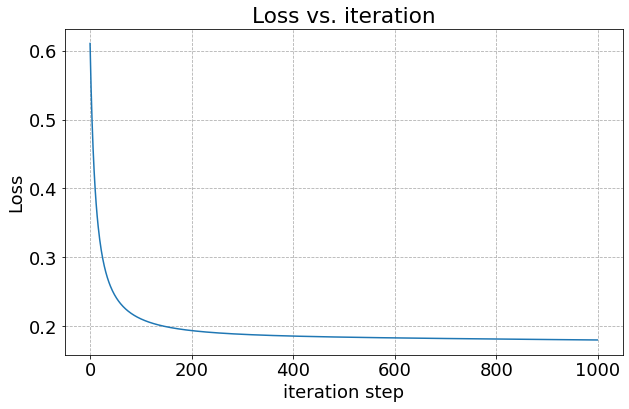

prediction: 0.99, target value: 1
prediction: 0.00, target value: 0
prediction: 0.05, target value: 0
prediction: 0.02, target value: 0
prediction: 0.79, target value: 1
prediction: 1.00, target value: 1
prediction: 0.90, target value: 0
prediction: 0.01, target value: 0
prediction: 0.08, target value: 0
prediction: 0.13, target value: 0
prediction: 0.74, target value: 1
prediction: 0.96, target value: 1
prediction: 0.96, target value: 1
prediction: 0.01, target value: 0
prediction: 0.01, target value: 0
prediction: 0.02, target value: 0
prediction: 0.03, target value: 0
prediction: 0.99, target value: 1
prediction: 1.00, target value: 1
prediction: 1.00, target value: 1
prediction: 1.00, target value: 1
prediction: 0.40, target value: 0
prediction: 0.97, target value: 1
prediction: 0.56, target value: 1
prediction: 0.00, target value: 0


In [ ]:
w_init  = np.zeros_like(X[0])
b_init  = 0.
iters = 1000

# TODO: Pick the learning rate
# alph = # YOUR CODE HERE
alph = 1e-2

w_out, b_out, J_hist = gradient_descent(X, y, w_init, b_init, alph, iters) 
print(f"\nupdated parameters: w:{w_out}, b:{b_out}")

# plot cost versus iteration  
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(J_hist)
ax.set_title("Loss vs. iteration")
ax.set_ylabel('Loss')
ax.set_xlabel('iteration step')
ax.grid(linestyle='--')
plt.show()
plt.close('all')

y_probas = []
m,_ = X.shape
for i in range(m):
    y_proba = f_logis(X[i], w_out, b_out)
    print(f"prediction: {y_proba:0.2f}, target value: {y[i]}")
    y_probas.append(y_proba)
y_probas = np.array(y_probas)

**Expected learning curve:**

Note that your learning curve can be slightly different, but still converge.
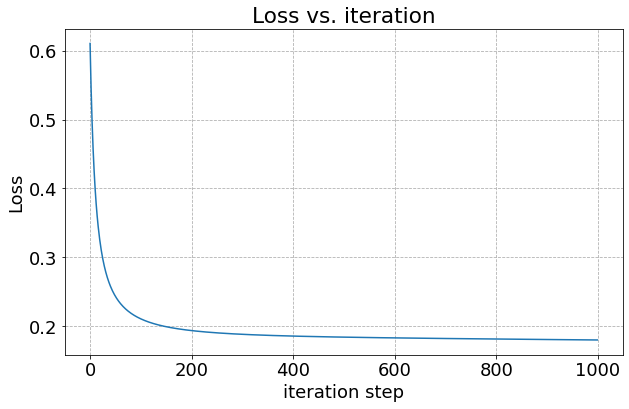

In [1]:
def accuracy_score(y_probas, y_true):
    """
    Calculate an accuracy for given predirected probabiliy
    
    Args:
      y_probas (ndarray (m,)   : Predicted probability, ranged from [0, 1]
      y (ndarray (m,))        : target values (0 or 1)
      
    Returns:
      acc (scalar)     : Accuracy
    """
    
    # TODO: Convert from probability to 0 and 1 using the threshold of 0.5.
    # Hint: You can use the array slicing in NumPy to assign the value 1
    #       to the example with the proba >= 0.5.
    # y_preds = # YOUR CODE HERE            # shape (m, )
    y_preds = np.zeros(len(y_probas))
    y_preds[y_probas>=0.5] = 1

    # TODO: Compute accuracy score.
    # Hint: You can use np.mean to compute this.
    # acc = # YOUR CODE HERE 
    acc = np.mean(y_preds == y_true)

    return acc

In [ ]:
acc = accuracy_score(y_probas, y)
print(f"{acc=}")

acc=0.96


**Expected outputs:**

Your accuracy should be more than 90% (i.e., >= 0.90)

# Extra Points (deadline: 27-Jan-2022 @ 23:55)

* Add Polynomial Features
* Add Feature Scaling
* Tran a new model
* Make prediction
* Discuss in English with the supporting evidences (e.g., learning curve, predicted values, etc.) whether the polynomial features and/or the feature scaling help improve the model performance in terms of accuracy.


# For Generate Materials in slides (NO need to read this)

## Linear Regression

In [ ]:
# def f_linear(x, w, b): 
#     """
#     Predict using linear regression
#     Args:
#       x (ndarray): Shape (n,) example with multiple features
#       w (ndarray): Shape (n,) model parameters   
#       b (scalar):             model parameter 
      
#     Returns:
#       p (scalar):  prediction
#     """
#     p = np.dot(x, w) + b
#     return p

In [ ]:
# def compute_loss(X, y, w, b): 
#     """
#     Compute mean-squared-error (MSE) loss
#     Args:
#       X (ndarray (m,n)): Data, m examples with n features
#       y (ndarray (m,)) : target values
#       w (ndarray (n,)) : model parameters
#       b (scalar)       : model parameter
      
#     Returns:
#       loss (scalar): loss
#     """
#     m = X.shape[0]
#     loss = 0.0
#     for i in range(m):
#         f_wb_i = f_linear(X[i], w, b)          # (n,)(n,) = scalar (see np.dot)
#         loss = loss + (f_wb_i - y[i])**2       # scalar
#     loss = loss / (2 * m)                      # scalar
#     return loss

In [ ]:
# def compute_gradient(X, y, w, b): 
#     """
#     Computes the gradient for linear regression
#     Args:
#       X (ndarray (m,n)): Data, m examples with n features
#       y (ndarray (m,)) : target values
#       w (ndarray (n,)) : model parameters
#       b (scalar)       : model parameter
      
#     Returns:
#       dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w.
#       dj_db (scalar):       The gradient of the cost w.r.t. the parameter b.
#     """
#     m, n = X.shape           # (number of examples, number of features)
#     dj_dw = np.zeros((n,))
#     dj_db = 0.

#     for i in range(m):
#         # Compute an error for each example i
#         err = f_linear(X[i], w, b) - y[i]
#         # For each weight j
#         for j in range(n):
#             dj_dw[j] = dj_dw[j] + err * X[i, j]
#         dj_db = dj_db + err
#     dj_dw = dj_dw / m
#     dj_db = dj_db / m

#     return dj_db, dj_dw

In [ ]:
# def gradient_descent(X, y, w_in, b_in, alpha, num_iters): 
#     """
#     Performs batch gradient descent to learn theta. Updates theta by taking 
#     num_iters gradient steps with learning rate alpha
    
#     Args:
#       X (ndarray (m,n))   : Data, m examples with n features
#       y (ndarray (m,))    : target values
#       w_in (ndarray (n,)) : initial model parameters  
#       b_in (scalar)       : initial model parameter
#       alpha (float)       : Learning rate
#       num_iters (int)     : number of iterations to run gradient descent
      
#     Returns:
#       w (ndarray (n,))         : Updated values of parameters 
#       b (scalar)               : Updated value of parameter 
#       J_history (ndarray (n,)) : History of losses
#       """
    
#     # An array to store cost J and w's at each iteration primarily for graphing later
#     J_history = []
#     w = copy.deepcopy(w_in)  #avoid modifying global w within function
#     b = b_in
    
#     for i in range(num_iters):

#         # Calculate the gradient with `compute_gradient` function
#         dj_db, dj_dw = compute_gradient(X, y, w, b)

#         # Update Parameters using w, b, alpha and gradient
#         w = w - alpha * dj_dw
#         b = b - alpha * dj_db
      
#         # Save cost J at each iteration
#         J_history.append(compute_loss(X, y, w, b))

#         # Print cost every at intervals 10 times or as many iterations if < 10
#         if i % math.ceil(num_iters / 10) == 0:
#             print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")
        
#     return w, b, J_history  # return final_w, final_b and J history

In [ ]:
# # ** For generate materials in slides **

# fig, ax = plt.subplots(1, n, figsize=(16, 4), sharey=True)
# for i in range(len(ax)):
#     ax[i].scatter(X[:,i],y)

#     # select one feature
#     _X = X[:,[i]]

#     # initialize parameters
#     initial_w = np.zeros(_X.shape[1], dtype=np.float32)
#     initial_b = 0.

#     # hyperparameter for training with gradient descent
#     alpha = 1.0e-5
#     iterations = 1000

#     # run gradient descent 
#     w_final, b_final, J_hist = gradient_descent(_X, y, initial_w, initial_b,
#                                                 alpha, iterations)
#     print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")

#     min_idx, max_idx = np.argmin(_X), np.argmax(_X)
#     y_preds = f_linear(_X[[min_idx, max_idx]], w_final, b_final)
#     display(y_preds)

#     # visualize
#     ax[i].scatter(_X,y)
#     ax[i].plot(_X[[min_idx, max_idx]], y_preds)
#     ax[i].grid(linestyle='--')
#     ax[i].set_xlabel(X_features[i])
# ax[0].set_ylabel("Final")
# plt.show()
# plt.close('all')

In [ ]:
# # ** For generate materials in slides **

# # Generate an array of evenly spaced values between -10 and 10
# z_tmp = np.arange(-10,11)

# # Use the function implemented above to get the sigmoid values
# y = sigmoid(z_tmp)

# # Code for pretty printing the two arrays next to each other
# np.set_printoptions(precision=3) 
# print("Input (z), Output (sigmoid(z))")
# print(np.c_[z_tmp, y])

# # Plot z vs sigmoid(z)
# fig,ax = plt.subplots(1,1,figsize=(8,4))
# ax.plot(z_tmp, y, c="b")

# ax.set_title("Sigmoid function")
# ax.set_ylabel('sigmoid(z)')
# ax.set_xlabel('z')
# ax.grid()
# plt.show()
# plt.close('all')